In [ ]:
import mod
import numpy as np

## 1. Matrix

In [ ]:
### Neccessary Function

In [ ]:
def transpose(a):
    a = np.array(a)
    p = np.zeros([a.shape[1], a.shape[0]])
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            p[j,i] = a[i,j]
    return p

def trace(a):
    a = np.array(a)
    if a.shape[0] == a.shape[1]:
        return np.array(np.sum([a[i,i] for i in range(a.shape[0])]))
    else:
        raise ValueError("Input matrix is not square")
        
        
def determinant(a):
    if a.shape[0] == a.shape[1]:
        if a.shape == (2,2):
            return a[0,0]*a[1,1]-a[0,1]*a[1,0]
        elif a.shape == (3,3):
            one = a[0,0]*determinant(a[1:,[1,2]])
            second = -1*a[0,1]*determinant(a[1:,[0,2]])
            third = a[0,2]*determinant(a[1:,[0,1]])
            return (one+second+third)
        else:
            raise "Work in progress"
    
    else:
        raise ValueError("Input Matrix is not a square matrix")
        
def multiply(a,b):
    a = np.array(a)
    b = np.array(b)
    if np.array(a).shape[1] == np.array(b).shape[0]:
        p = np.zeros([a.shape[0], b.shape[1]])
        for i in range(a.shape[0]):
            for j in range(b.shape[1]):
                p[i,j] = a[i,:]@b[:,j]
                return p
    else:
        print("Matrix size is not compatible for multiplication")
        raise ValueError("Matrix size is not compatible for multiplication")

### b) Python Program to check the hermicity of a given matrix 

In [ ]:
def her(a):
    if a.shape[0] == a.shape[1]:
        for i in range(a.shape[0]):
            for j in range(a.shape[1]):
                if (np.conjugate(m)[i,j] == transpose(m)[i,j]):
                    print("Trace: ", mod.trace(a))
                    print("Determinant: ", mod.determinant(a))
                    print("This is a Hermitian Matrix")
                    return True
                else:
                    return False
    else:
        raise ValueError("Entered matrix is not compatible")
        

In [ ]:
m = np.array([[np.complex(3,0),np.complex(2,-1),np.complex(0,-3)],
        [np.complex(2,1),np.complex(0,0),np.complex(1,-1)],
        [np.complex(0,3),np.complex(1,1),np.complex(0,0)]])


transpose(m)

array([[3.+0.j, 2.+1.j, 0.+3.j],
       [2.-1.j, 0.+0.j, 1.+1.j],
       [0.-3.j, 1.-1.j, 0.+0.j]])

In [ ]:
her(m)

Trace:  (3+0j)
Determinant:  (12+0j)
This is a Hermitian Matrix


True

### c) program to check it it is a unitary matrix

In [ ]:
P = np.array([
    [np.complex(-1/np.sqrt(7)),np.complex(1/np.sqrt(728),-21/np.sqrt(728)),np.complex(1/np.sqrt(40),3/np.sqrt(40))],
    [np.complex(-1/np.sqrt(7), 2/np.sqrt(7)),np.complex(6/np.sqrt(728),-9/np.sqrt(728)),np.complex(-2/np.sqrt(40),-1/np.sqrt(40))],
    [np.complex(1/np.sqrt(7)),np.complex(13/np.sqrt(728)),np.complex(5/np.sqrt(40))]
])
print(P)

[[-0.37796447+0.j          0.03706247-0.77831178j  0.15811388+0.47434165j]
 [-0.37796447+0.75592895j  0.22237479-0.33356219j -0.31622777-0.15811388j]
 [ 0.37796447+0.j          0.48181206+0.j          0.79056942+0.j        ]]


In [ ]:
def unitary(a):
    if abs(determinant(a))==1:
        return True
    else:
        return False

In [ ]:
unitary(P)

False

In [ ]:
determinant(P)

(-0.9036816377213757-0.1417539823876667j)

In [ ]:
print(P)

[[-0.37796447+0.j          0.03706247-0.77831178j  0.15811388+0.47434165j]
 [-0.37796447+0.75592895j  0.22237479-0.33356219j -0.31622777-0.15811388j]
 [ 0.37796447+0.j          0.48181206+0.j          0.79056942+0.j        ]]


In [ ]:
A = m
print(A)

[[3.+0.j 2.-1.j 0.-3.j]
 [2.+1.j 0.+0.j 1.-1.j]
 [0.+3.j 1.+1.j 0.+0.j]]


### Find the trace and the determinant of D where D = $P_{d} A P$ where $P_d$ is P_dagger

In [ ]:
C = mod.multiply(P,A)
print(C)

[[-1.70448165-1.04521945j -1.07215671+1.01042001j -0.74124932+0.31851917j]
 [ 0.11876001+0.87435395j -0.15811388+1.41548072j  2.15659944+0.57795643j]
 [ 2.09751753+2.8535203j   1.54649836+0.41260494j  0.48181206-1.61570547j]]


In [ ]:
P_dagger = mod.transpose(np.conjugate(P))
print(P_dagger)

[[-0.37796447-0.j         -0.37796447-0.75592895j  0.37796447-0.j        ]
 [ 0.03706247+0.77831178j  0.22237479+0.33356219j  0.48181206-0.j        ]
 [ 0.15811388-0.47434165j -0.31622777+0.15811388j  0.79056942-0.j        ]]


In [ ]:
D = mod.multiply(P_dagger, C)
print(D)

[[ 2.05308301+1.05333625j  2.11952286-0.64143142j  0.08404977-2.57975114j]
 [ 1.49570137+0.24355205j -0.58834841-0.33619909j  0.24355205-0.49570137j]
 [ 0.71713717+2.64143142j  1.35856858+0.52190856j -0.35856858-0.71713717j]]


In [ ]:
print("Trace: ", mod.trace(D))
print("Determinant", mod.determinant(D))

Trace:  (1.1061660235702588+2.220446049250313e-16j)
Determinant (10.040816326530608+4.440892098500626e-16j)


## 2. Fourier Series

### a) With $m=1$ plotting the wavefunction

In [ ]:
def f(t):
    return t%np.pi

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-5*np.pi, 5*np.pi, 1000)

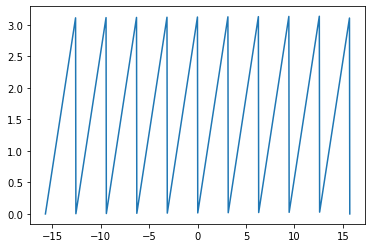

In [ ]:
plt.plot(x,f(x))
plt.show()

### b) Programme to approximately match wave function

In [ ]:
def fourier_c(f,T,n):
    t = np.linspace(0,np.pi,1000)
    dt = t[1]-t[0]
    sum = np.sum(f(t)*np.exp(n*complex(0,1)*2*np.pi*t/T)*dt)
    return sum/T
    
    

In [ ]:
T = np.pi
coe = [fourier_c(f,T,i) for i in range(-15,15)]
coe;

In [ ]:
def f_new(coe,t):
    sum = 0
    for n, i in enumerate(coe):
        sum += i*np.exp(-t*complex(0,1)*(n-15)*2*np.pi/T)
    return sum
 
        
    

### c) ploting the two result

/home/iiserb/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


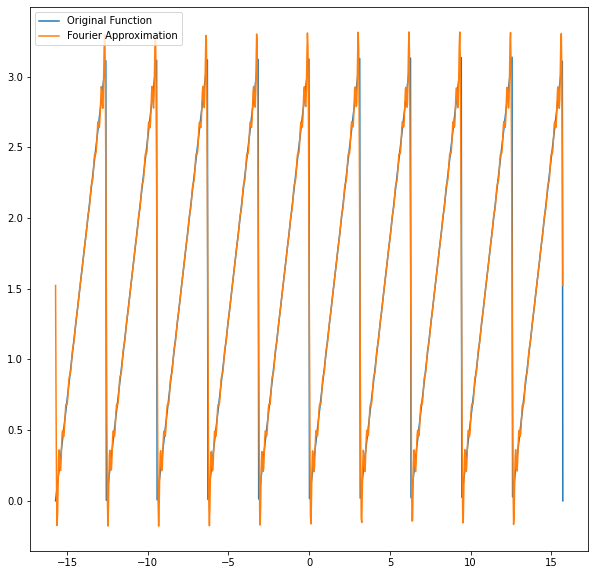

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(x,f(x), label="Original Function")
plt.plot(x,f_new(coe, x), label="Fourier Approximation")
plt.legend()
plt.show()

[-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]